Loading data...
Loaded 25,000 rows
       age  time_in_hospital  n_lab_procedures  n_procedures  n_medications  \
0  [70-80)                 8                72             1             18   
1  [70-80)                 3                34             2             13   
2  [50-60)                 5                45             0             18   
3  [70-80)                 2                36             0             12   
4  [60-70)                 1                42             0              7   

   n_outpatient  n_inpatient  n_emergency medical_specialty       diag_1  \
0             2            0            0           Missing  Circulatory   
1             0            0            0             Other        Other   
2             0            0            0           Missing  Circulatory   
3             1            0            0           Missing  Circulatory   
4             0            0            0  InternalMedicine        Other   

        diag_2       diag_3 gluco

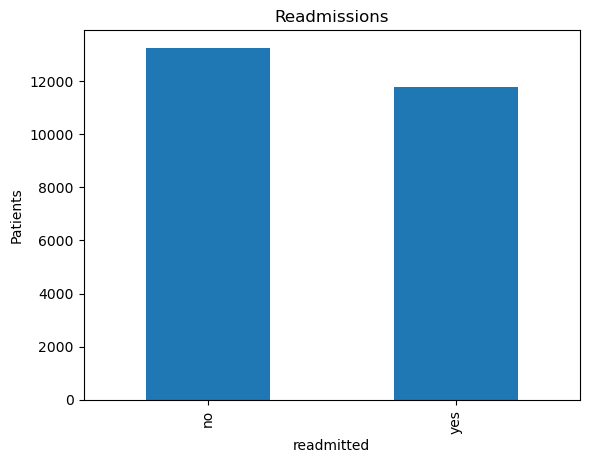


Average stay by readmission:
readmitted
no     4.331345
yes    4.590778
Name: time_in_hospital, dtype: float64


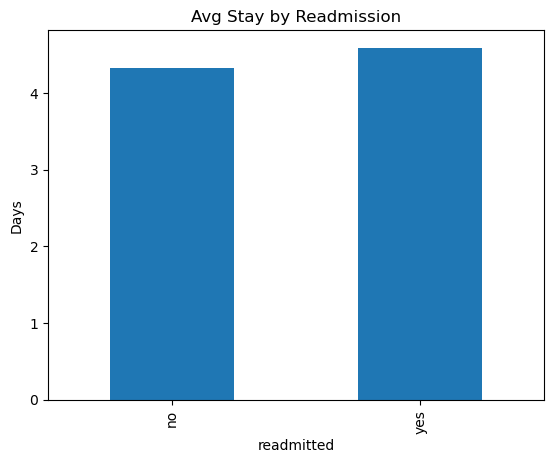


Top diagnoses for readmitted patients:
diag_1
Circulatory        3750
Other              2932
Respiratory        1806
Digestive          1105
Diabetes            937
Injury              727
Musculoskeletal     495
Missing               2
Name: count, dtype: int64


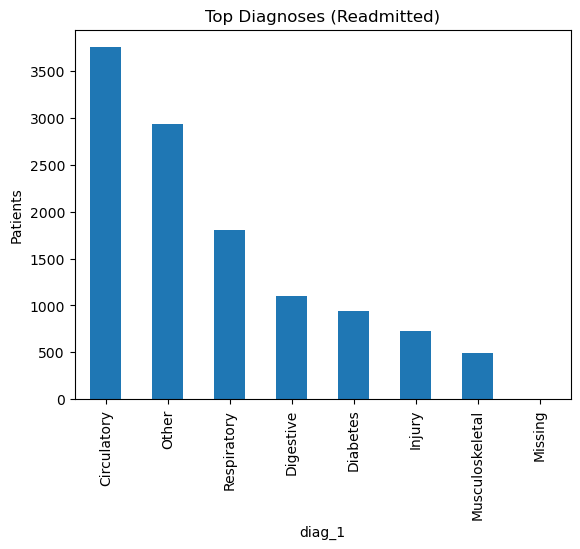


Medication changes by readmission:
change            no       yes
readmitted                    
no          0.560169  0.439831
yes         0.517015  0.482985


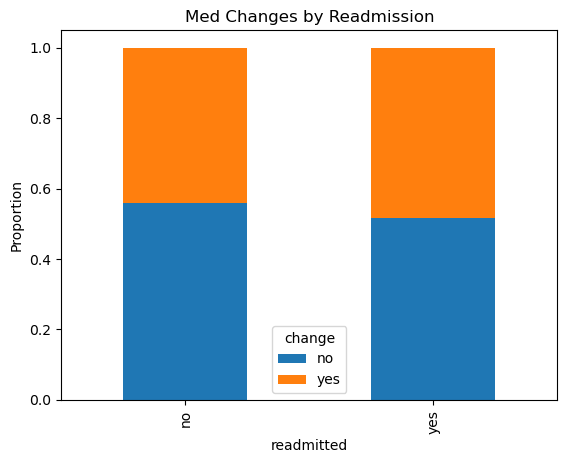


Saved cleaned data.



**Key Takeaways:**
- Readmitted patients had longer stays.
- Circulatory & respiratory diagnoses common among readmits.
- Many had recent medication changes. Follow-up needed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load data
print("Loading data...")
df = pd.read_csv('hospital_readmissions.csv')
print(f"Loaded {len(df):,} rows")
print(df.head())

# Quick data info
df.info()

# Check readmission counts
readmit_counts = df['readmitted'].value_counts()
print("\nReadmission counts:")
print(readmit_counts)

readmit_counts.plot(kind='bar', title='Readmissions')
plt.ylabel('Patients')
plt.show()

# Average stay by readmission
avg_stay = df.groupby('readmitted')['time_in_hospital'].mean()
print("\nAverage stay by readmission:")
print(avg_stay)

avg_stay.plot(kind='bar', title='Avg Stay by Readmission')
plt.ylabel('Days')
plt.show()

# Top diagnoses for readmitted
top_diag = df[df['readmitted'] == 'yes']['diag_1'].value_counts().head(10)
print("\nTop diagnoses for readmitted patients:")
print(top_diag)

top_diag.plot(kind='bar', title='Top Diagnoses (Readmitted)')
plt.ylabel('Patients')
plt.show()

# Medication changes
med_changes = df.groupby('readmitted')['change'].value_counts(normalize=True).unstack()
print("\nMedication changes by readmission:")
print(med_changes)

med_changes.plot(kind='bar', stacked=True, title='Med Changes by Readmission')
plt.ylabel('Proportion')
plt.show()

# Save cleaned data
df.to_csv('cleaned_hospital_data.csv', index=False)
print("\nSaved cleaned data.")

# Short business summary
from IPython.display import Markdown
display(Markdown("""
**Key Takeaways:**
- Readmitted patients had longer stays.
- Circulatory & respiratory diagnoses common among readmits.
- Many had recent medication changes. Follow-up needed.
"""))
